<a href="https://colab.research.google.com/github/ifeomamegwai/Renewable-Energy-Predictive-Analysis/blob/main/Renewable_Energy_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 Renewable Energy Worldwide Predictive Analysis

**1.1 Regression Analysis:**

To forecast renewable energy growth by identifying key drivers behind renewable energy adoption in G20 countries and globally

**IMPORT THE LIBRARIES AND DATA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:

project_id = "renewableenergy-434508"
dataset = "RWE"
table = "global_data_on_sustainable_energy"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_global = pd.read_gbq(query, project_id=project_id)



In [ ]:
project_id = "renewableenergy-434508"
dataset = "RWE"
table = "01_rwe_share"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_rwe_share = pd.read_gbq(query, project_id=project_id)




In [ ]:
project_id = "renewableenergy-434508"
dataset = "RWE"
table = "countries_list"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"
df_countries = pd.read_gbq(query, project_id=project_id)


In [ ]:
df_global

,entity,year,access_to_electricity,clean_cooking_fuel,rwe_electricity_per_capita,dev_countries_financial_flows,rwe_energy_share_total,electricity_from_fossil_fuels_TWh,electricity_from_nuclear_TWh,electricity_from_rwe_TWh,...,energy_use_per_capita,primary_energy_intensity_level,value_co2_emissions_kt_by_country,renewables,gdp_growth,gdp_per_capita,density,land_area_Km2,latitude,longitude
0,Canada,2000,100.0,100.0,NaN,<NA>,22.04,155.56,69.16,363.70,...,118875.34,9.31,514220.00,29.77,4.92,24271.00,4,9984670,56.130366,-106.346771
1,Canada,2001,100.0,100.0,NaN,<NA>,21.53,159.93,72.86,339.58,...,115218.68,9.04,506620.00,28.20,1.41,23822.06,4,9984670,56.130366,-106.346771
2,Canada,2002,100.0,100.0,NaN,<NA>,21.77,155.12,71.75,357.06,...,117915.38,8.77,524349.98,28.55,3.42,24255.34,4,9984670,56.130366,-106.346771
3,Canada,2003,100.0,100.0,NaN,<NA>,21.18,157.35,71.15,343.88,...,117365.12,8.89,544539.98,27.18,3.81,28300.46,4,9984670,56.130366,-106.346771
4,Canada,2004,100.0,100.0,NaN,<NA>,21.58,148.86,85.87,347.68,...,118078.05,8.77,536419.98,26.83,3.91,32143.68,4,9984670,56.130366,-106.346771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Qatar,2016,100.0,100.0,16.24,<NA>,0.06,39.88,0.00,0.03,...,223248.58,5.88,86920.00,0.07,3.06,57162.97,248,11586,25.354826,51.183884
3645,Qatar,2017,100.0,100.0,15.82,<NA>,0.07,42.94,0.00,0.03,...,206889.17,6.80,87540.00,0.07,-1.50,59124.87,248,11586,25.354826,51.183884
3646,Qatar,2018,100.0,100.0,15.49,<NA>,0.05,45.16,0.00,0.02,...,202570.30,6.46,86420.00,0.07,1.23,65907.95,248,11586,25.354826,51.183884
3647,Qatar,2019,100.0,100.0,15.22,<NA>,0.04,46.98,0.00,0.03,...,208021.30,6.79,91970.00,0.07,0.69,62276.43,248,11586,25.354826,51.183884


In [ ]:
df_rwe_share

In [ ]:
df_countries

**PREPROCESSING**

**CLEANING**


**HANDLING NULL VALUES**

**EXPLORE CORRELATION AMONG VARIABLES**

In [ ]:
df_global.isnull().sum()

,0
entity,0
year,0
access_to_electricity,10
clean_cooking_fuel,169
rwe_electricity_per_capita,931
dev_countries_financial_flows,2089
rwe_energy_share_total,194
electricity_from_fossil_fuels_TWh,21
electricity_from_nuclear_TWh,126
electricity_from_rwe_TWh,21


In [ ]:
# Replace NaN values in density_unit, Land_area_km2, latitude, longitude' columns with 0
# Replace NaN values in specific columns using loc[]
df_global.loc[:, ['density', 'land_area_Km2', 'latitude', 'longitude']] = df_global[['density', 'land_area_Km2', 'latitude', 'longitude']].fillna(0)

In [ ]:
# create a pd.Serie with the sum of null values
df_global_null = df_global.isna().sum()

# Get only the columns with 30% missing values
columns_to_drop = df_global_null[df_global_null/len(df_global) > .3].index
columns_to_drop
# drop the columns
df_global.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Fill NaN values of the numeric columns with the mean of each column
numeric_columns = df_global.select_dtypes(include=['number'])

df_global.fillna(numeric_columns.mean(), inplace=True)

In [ ]:
df_rwe_share.isnull().sum()

In [ ]:
df_global.isnull().sum()

,0
entity,0
year,0
access_to_electricity,0
clean_cooking_fuel,0
rwe_electricity_per_capita,0
rwe_energy_share_total,0
electricity_from_fossil_fuels_TWh,0
electricity_from_nuclear_TWh,0
electricity_from_rwe_TWh,0
low_carbon_electricity,0


In [ ]:
df_global.to_csv('df_global_clean.csv', index=False)

In [ ]:
# Merge the datasets
df = pd.merge(df_global, df_rwe_share, on='entity')
df = pd.merge(df, df_countries, on='entity')
df


,entity,year_x,access_to_electricity,clean_cooking_fuel,rwe_electricity_per_capita,rwe_energy_share_total,electricity_from_fossil_fuels_TWh,electricity_from_nuclear_TWh,electricity_from_rwe_TWh,low_carbon_electricity,...,gdp_per_capita,density,land_area_Km2,latitude,longitude,code_x,year_y,renewables_equ_primary_energy,code_y,g20
0,Canada,2000,100.0,100.0,113.137498,22.040000,155.56,69.16,363.70,73.56,...,24271.00,4,9984670,56.130366,-106.346771,CAN,2008,28.59,CAN,1
1,Canada,2000,100.0,100.0,113.137498,22.040000,155.56,69.16,363.70,73.56,...,24271.00,4,9984670,56.130366,-106.346771,CAN,2009,29.21,CAN,1
2,Canada,2000,100.0,100.0,113.137498,22.040000,155.56,69.16,363.70,73.56,...,24271.00,4,9984670,56.130366,-106.346771,CAN,2015,28.76,CAN,1
3,Canada,2000,100.0,100.0,113.137498,22.040000,155.56,69.16,363.70,73.56,...,24271.00,4,9984670,56.130366,-106.346771,CAN,2013,28.94,CAN,1
4,Canada,2000,100.0,100.0,113.137498,22.040000,155.56,69.16,363.70,73.56,...,24271.00,4,9984670,56.130366,-106.346771,CAN,2002,28.55,CAN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31747,Qatar,2020,100.0,100.0,14.960000,32.638165,44.63,0.00,0.02,0.04,...,50124.39,248,11586,25.354826,51.183884,QAT,2016,0.07,QAT,0
31748,Qatar,2020,100.0,100.0,14.960000,32.638165,44.63,0.00,0.02,0.04,...,50124.39,248,11586,25.354826,51.183884,QAT,2017,0.07,QAT,0
31749,Qatar,2020,100.0,100.0,14.960000,32.638165,44.63,0.00,0.02,0.04,...,50124.39,248,11586,25.354826,51.183884,QAT,2019,0.07,QAT,0
31750,Qatar,2020,100.0,100.0,14.960000,32.638165,44.63,0.00,0.02,0.04,...,50124.39,248,11586,25.354826,51.183884,QAT,2018,0.07,QAT,0


In [ ]:
df.columns

Index(['entity', 'year_x', 'access_to_electricity ', 'clean_cooking_fuel',
       'rwe_electricity_per_capita', 'rwe_energy_share_total',
       'electricity_from_fossil_fuels_TWh', 'electricity_from_nuclear_TWh',
       'electricity_from_rwe_TWh', 'low_carbon_electricity ',
       'energy_use_per_capita', 'primary_energy_intensity_level',
       'value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'density', 'land_area_Km2', 'latitude', 'longitude', 'code_x', 'year_y',
       'renewables_equ_primary_energy', 'code_y', 'g20'],
      dtype='object')

In [ ]:
df.describe()

,year_x,access_to_electricity,clean_cooking_fuel,rwe_electricity_per_capita,rwe_energy_share_total,electricity_from_fossil_fuels_TWh,electricity_from_nuclear_TWh,electricity_from_rwe_TWh,low_carbon_electricity,energy_use_per_capita,...,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density,land_area_Km2,latitude,longitude,year_y,renewables_equ_primary_energy,g20
count,31752.0,31752.000000,31752.000000,31752.000000,31752.000000,31752.000000,31752.000000,31752.000000,31752.000000,31752.000000,...,3.175200e+04,31752.000000,31752.000000,31752.0,31752.0,31752.000000,31752.000000,31752.0,31752.000000,31752.0
mean,2010.0,97.323776,89.787640,110.062825,17.874595,165.033380,32.242500,53.932037,34.773439,44733.179808,...,3.457606e+05,3.203326,22477.972301,255.638889,1115108.611111,31.256783,24.091371,2010.0,11.986872,0.527778
std,6.055396,7.939053,20.560062,87.935168,16.311308,524.585993,108.674954,156.740955,30.314007,41803.607610,...,1.100717e+06,4.489531,22330.404841,977.768125,2315940.304581,25.306617,56.494015,6.055396,14.989974,0.499236
min,2000.0,32.000000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1053.620000,...,1.630000e+03,-36.660000,383.340000,3.0,716.0,-40.900557,-106.346771,2000.0,0.000000,0.0
25%,2005.0,99.507500,91.525000,63.650000,4.675000,11.230000,0.000000,1.675000,8.050000,17713.525000,...,4.096750e+04,1.450000,5106.912500,34.75,65532.5,22.936440,3.905889,2005.0,2.137500,0.0
50%,2010.0,100.000000,100.000000,113.137498,13.125000,36.365000,0.000000,10.070000,27.700000,32247.385000,...,8.812500e+04,3.320000,13283.774360,96.5,300670.0,39.021963,22.380909,2010.0,6.290000,1.0
75%,2015.0,100.000000,100.000000,113.137498,29.635000,103.952500,14.325000,34.482500,58.830000,54655.505000,...,2.238925e+05,5.222500,37180.380000,166.25,762962.5,48.955588,51.849868,2015.0,16.842500,1.0
max,2020.0,100.000000,100.000000,705.900000,81.070000,5184.130000,809.410000,2184.940000,100.000000,262585.700000,...,1.070722e+07,53.380000,123514.200000,8358.0,9984670.0,64.963051,174.885971,2020.0,86.840000,1.0


In [ ]:
# Check correlation between proposed features and target
corr = df[['renewables_equ_primary_energy', 'primary_energy_intensity_level', 'rwe_energy_share_total', 'electricity_from_rwe_TWh', 'gdp_per_capita',
           'clean_cooking_fuel', 'value_co2_emissions_kt_by_country', 'rwe_electricity_per_capita','low_carbon_electricity ', 'density', 'gdp_growth','land_area_Km2']].corr()
corr

,renewables_equ_primary_energy,primary_energy_intensity_level,rwe_energy_share_total,electricity_from_rwe_TWh,gdp_per_capita,clean_cooking_fuel,value_co2_emissions_kt_by_country,rwe_electricity_per_capita,low_carbon_electricity,density,gdp_growth,land_area_Km2
renewables_equ_primary_energy,1.000000,-0.096418,0.705207,0.143934,0.276879,0.066579,-0.071599,0.336243,0.747710,-0.135172,-0.112405,0.083375
primary_energy_intensity_level,-0.096418,1.000000,-0.178033,0.010015,-0.176374,0.049555,0.065806,-0.233561,-0.186590,-0.094392,0.158298,0.065254
rwe_energy_share_total,0.705207,-0.178033,1.000000,0.101150,0.026927,-0.419983,-0.070449,0.199385,0.586018,-0.097794,-0.116955,0.036111
electricity_from_rwe_TWh,0.143934,0.010015,0.101150,1.000000,0.058250,-0.056710,0.777406,0.406458,0.155540,-0.048457,0.010688,0.704346
gdp_per_capita,0.276879,-0.176374,0.026927,0.058250,1.000000,0.431352,-0.001593,-0.047581,0.266660,0.117064,-0.164266,-0.011350
clean_cooking_fuel,0.066579,0.049555,-0.419983,-0.056710,0.431352,1.000000,-0.128557,0.170698,0.116961,-0.034993,-0.192161,-0.071515
value_co2_emissions_kt_by_country,-0.071599,0.065806,-0.070449,0.777406,-0.001593,-0.128557,1.000000,0.150338,-0.060455,-0.029697,0.087516,0.629638
rwe_electricity_per_capita,0.336243,-0.233561,0.199385,0.406458,-0.047581,0.170698,0.150338,1.000000,0.366814,-0.132487,-0.113724,0.299384
low_carbon_electricity,0.747710,-0.186590,0.586018,0.155540,0.266660,0.116961,-0.060455,0.366814,1.000000,-0.172831,-0.182184,0.058445
density,-0.135172,-0.094392,-0.097794,-0.048457,0.117064,-0.034993,-0.029697,-0.132487,-0.172831,1.000000,0.048602,-0.088320


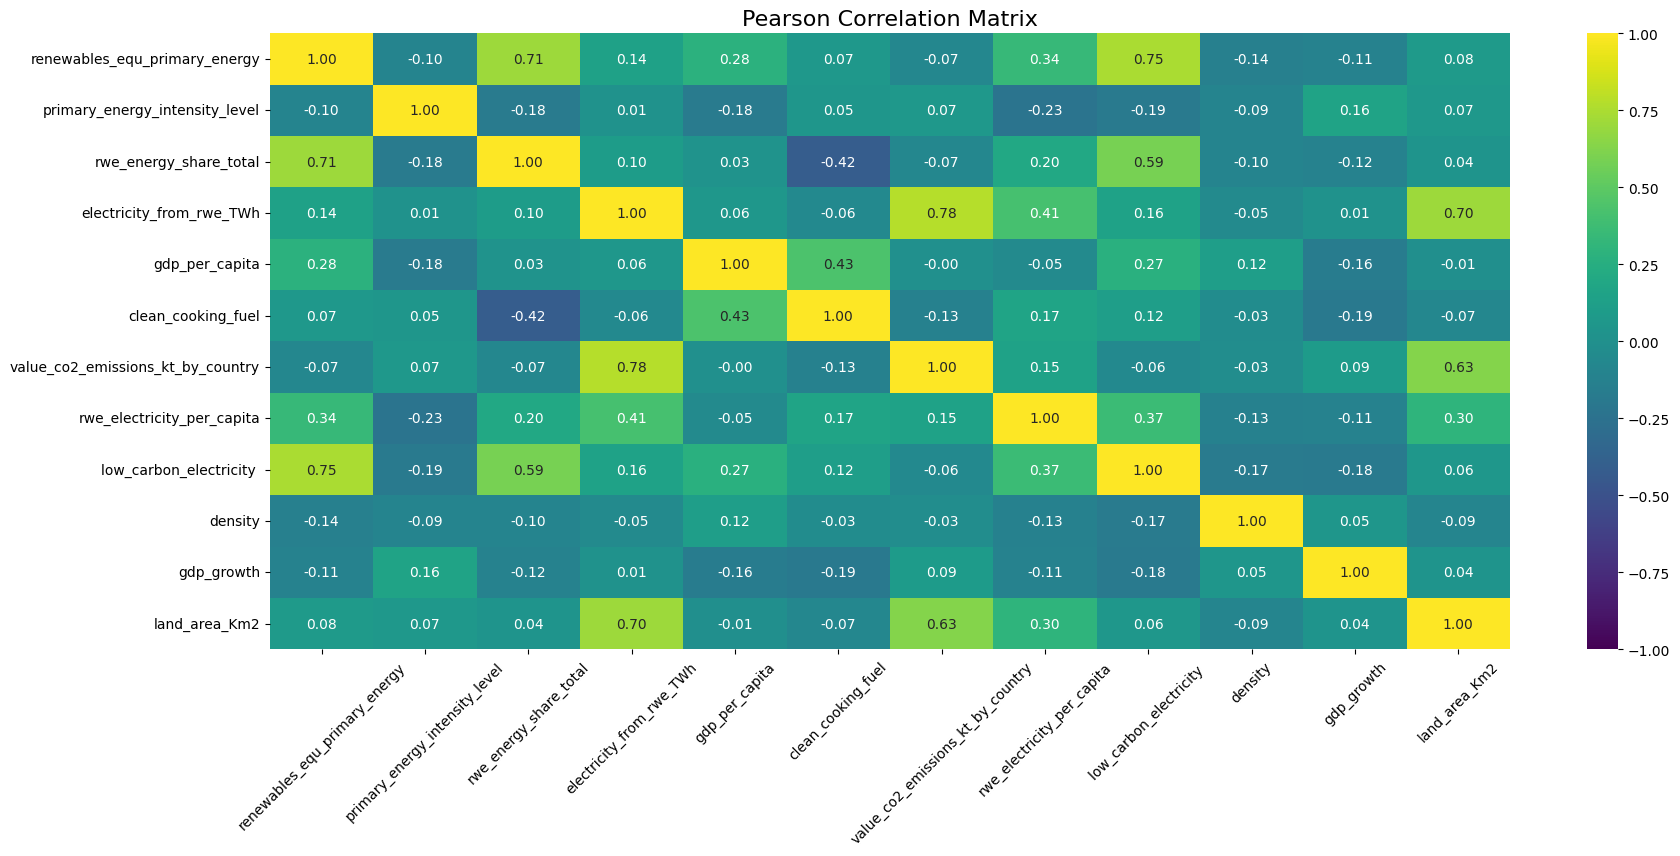

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr, vmin = -1, vmax = 1,cmap = "viridis",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

**PICKING X AND y**



In [ ]:
# Select relevant features and target for regression analysis
X = df[['low_carbon_electricity ', 'rwe_energy_share_total', 'rwe_electricity_per_capita', 'gdp_per_capita', 'electricity_from_rwe_TWh',
        'density', 'gdp_growth', 'primary_energy_intensity_level', 'land_area_Km2', 'clean_cooking_fuel']]

y = df['renewables_equ_primary_energy']



**TRAIN TEST SPLIT**

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22226, 10), (9526, 10), (22226,), (9526,))

**NORMALIZATION**

In [ ]:
# Apply StandardScaler to standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



**TRAINING A LINEAR REGRESSION MODEL**

In [ ]:
# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**EVALUATING THE MODEL AND MAKING PREDICTIONS**

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)



In [ ]:
# Get the intercept from the trained model
model.intercept_

11.978993171393864

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 58.200876084791325
Mean Absolute Error: 5.6025662833571115
R-squared: 0.7383886175608678


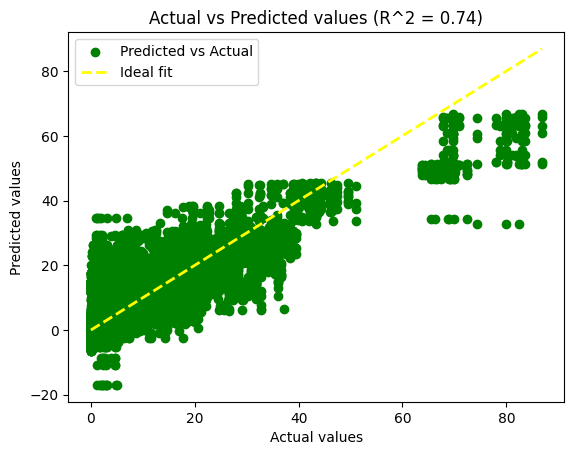

In [ ]:
#Scatter plot of actual vs predicted values (Green)
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')

# Plotting a line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='--', lw=2, label='Ideal fit')

# Labeling the plot
plt.title(f'Actual vs Predicted values (R^2 = {r2:.2f})')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

**Conclusion:**

The model demonstrates a good fit, as a significant portion of renewable energy growth is driven by factors such as Low Carbon Electricity, GDP per capita, Primary Energy Intensity Level, the population density of the country and electricity from renewable sources. However, further refinement could enhance prediction accuracy.
